In [ ]:
#Multivariate

Our goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data_set = pd.read_csv("50_Startups.csv")

In [3]:
data_set.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data_set.count()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

In [5]:
data_set.size

250

In [6]:
data_set.shape

(50, 5)

In [7]:
data_set.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
x = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [9]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [10]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [12]:
pd.get_dummies(data_set[['R&D Spend' , 'Administration' , 'Marketing Spend' , 'State']])

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [13]:
#Using get_dummies() for One-Hot Encoding

x = pd.get_dummies(data_set[['R&D Spend' , 'Administration' , 'Marketing Spend' , 'State']] , drop_first=True)

In [14]:
x.head(5)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [15]:
x = x[['State_Florida' , 'State_New York' , 'R&D Spend' , 'Administration' , 'Marketing Spend']]

In [16]:
x.head(5)

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend
0,0,1,165349.20,136897.80,471784.10
1,0,0,162597.70,151377.59,443898.53
2,1,0,153441.51,101145.55,407934.54
3,0,1,144372.41,118671.85,383199.62
4,1,0,142107.34,91391.77,366168.42


In [17]:
# Splitting the dataset into training and test set.

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [18]:
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred= regressor.predict(x_test)  

In [20]:
x_test

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend
28,1,0,66051.52,182645.56,118148.20
11,0,0,100671.96,91790.61,249744.55
10,1,0,101913.08,110594.11,229160.95
41,1,0,27892.92,84710.77,164470.71
2,1,0,153441.51,101145.55,407934.54
27,0,1,72107.60,127864.55,353183.81
38,0,1,20229.59,65947.93,185265.10
31,0,1,61136.38,152701.92,88218.23
22,1,0,73994.56,122782.75,303319.26
4,1,0,142107.34,91391.77,366168.42


In [21]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [22]:
y_pred

array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569552])

In [23]:
#Now compare the actual output values for x_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,103282.38,103015.201598
1,144259.40,132582.277608
2,146121.95,132447.738452
3,77798.83,71976.098513
4,191050.39,178537.482211
5,105008.31,116161.242302
6,81229.06,67851.692097
7,97483.56,98791.733747
8,110352.25,113969.435330
9,166187.94,167921.065696


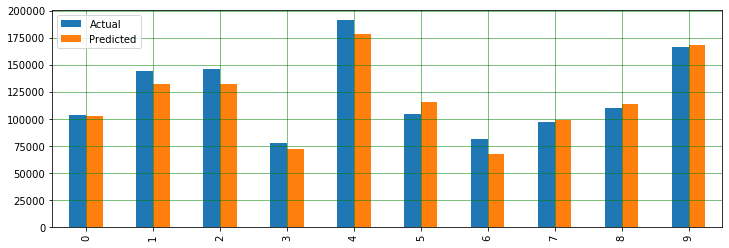

In [24]:
#We can also visualize comparison result as a bar graph.
df1 = df
df1.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.9501847627493607
Test Score:  0.9347068473283057


In [26]:
#The above score tells that our model is 95% accurate with the training dataset and 93% accurate with the test dataset.

In [27]:
#EXTRAS:_

#To retrieve the intercept:
print(f"Intercept : {regressor.intercept_}")

#For retrieving the slope:
print(f"Slope : {regressor.coef_}")

Intercept : 42554.16761773784
Slope : [-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7514.293659639106
Mean Squared Error: 83502864.03249668
Root Mean Squared Error: 9137.99015279053
